<a href="https://colab.research.google.com/github/ilhamydn17/PCVK_Ganjil_2023/blob/jobsheet-week-07/pcvk_week_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCVK Week-07 - Filtering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

#### 1. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

##### Konvolusi tanpa library

In [ ]:
# preprocessing
def preProcess(image):
  image = cv.imread(image)
  image = cv.cvtColor(src=image, code=cv.COLOR_BGR2GRAY)
  return image

In [ ]:
def convolution2d(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

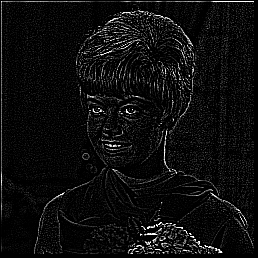

In [ ]:
# Grayscale Image
image = preProcess('drive/MyDrive/Kuliah/PCVK/week-07/female.tiff')

# Edge Detection Kernel
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -
                                               1]])

# Convolve and Save Output
output = convolution2d(image, kernel, padding=2)
cv2_imshow(output)

#### 2. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter

In [ ]:
# image
img = preProcess('drive/MyDrive/Kuliah/PCVK/week-07/female.tiff')

##### **Sharpening**

In [ ]:
# initiate kernel
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

In [ ]:
# Apply the filter matrix to the image
sharpened_img = cv.filter2D(img, -1, kernel_sharpen)

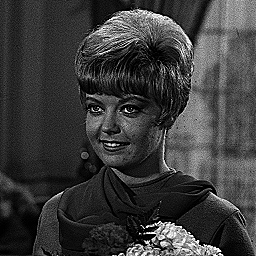

In [ ]:
cv2_imshow(sharpened_img)

##### **Emboss**

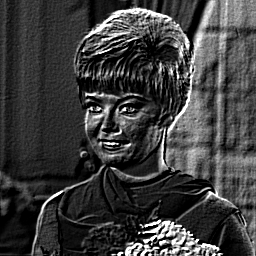

In [ ]:
# define kernel emboss
kernel_emboss = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
emboss_img = cv.filter2D(src=img, kernel=kernel_emboss, ddepth=-1)
cv2_imshow(emboss_img)

##### **Left Sobel Edge Detection**

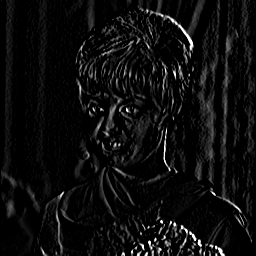

In [ ]:
# define kernel
kernel_sobel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype=np.float32)

# Apply the filter2D function to perform convolution with the custom kernel
sobel_x = cv.filter2D(img, -1, kernel_sobel)

sobel_x = cv.normalize(sobel_x, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

cv2_imshow(sobel_x)


##### **Canny Edge Detection**

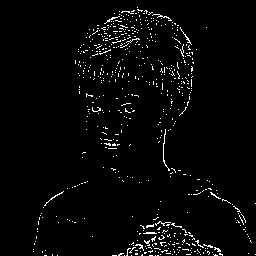

In [ ]:
# Define the custom kernel
kernel_canny = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# Convolve the image with the kernel
convolved_image = cv.filter2D(img, -1, kernel_canny)

# Apply a threshold to convert the result to binary
threshold = 100  # You can adjust this threshold
canny_image = (convolved_image >= threshold) * 255

cv2_imshow(canny_image)

##### **Prewidtt Edge Detection**

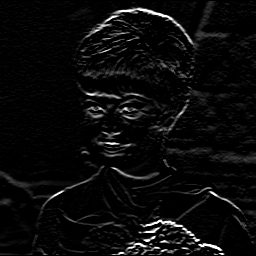

In [ ]:
# Define the custom Prewitt kernel
kernel = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
img_prewitt = cv.filter2D(img, -1, kernel)

cv2_imshow(img_prewitt)

##### **5x5 Gaussian Blur**

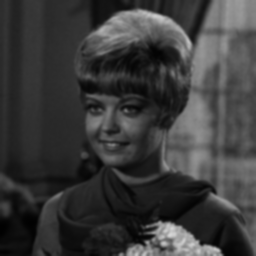

In [ ]:
# Apply 5x5 Gaussian blur
blurred_image = cv.GaussianBlur(image, (5, 5), 0)

cv2_imshow(blurred_image)

##### **21x21 Gaussian Blur**

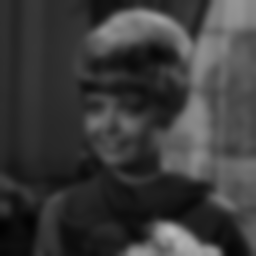

In [ ]:
blurred_image = cv.GaussianBlur(image, (21, 21), 0)

cv2_imshow(blurred_image)

##### **Average Filter**

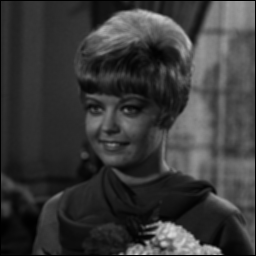

In [ ]:
# Define the kernel for the average filter
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) / 9  # 3x3 kernel with normalization

# Get the dimensions of the image
height, width = img.shape

# Create an output image with the same dimensions
output_image = np.zeros((height, width), dtype=np.uint8)

# Apply the average filter manually
for i in range(1, height - 1):
  for j in range(1, width - 1):
    # Apply the filter to each channel separately
    output_image[i, j] = np.sum(img[i - 1:i + 2, j - 1:j + 2] * kernel)

cv2_imshow(output_image)

##### **Low Pass Filter**

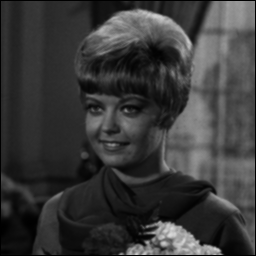

In [ ]:
# Define the kernel for the average filter
kernel = np.array([[1, 1, 1],
                   [1, 4, 1],
                   [1, 1, 1]]) / 12

# Get the dimensions of the image
height, width = img.shape

# Create an output image with the same dimensions
output_image = np.zeros((height, width), dtype=np.uint8)

# Apply the average filter manually
for i in range(1, height - 1):
  for j in range(1, width - 1):
    # Apply the filter to each channel separately
    output_image[i, j] = np.sum(img[i - 1:i + 2, j - 1:j + 2] * kernel)

cv2_imshow(output_image)

##### **High Pass Filter**

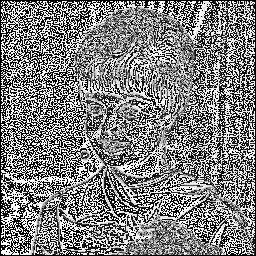

In [ ]:
# Define the kernel for the average filter
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])
# Get the dimensions of the image
height, width = img.shape

# Create an output image with the same dimensions
output_image = np.zeros((height, width), dtype=np.uint8)

# Apply the average filter manually
for i in range(1, height - 1):
  for j in range(1, width - 1):
    # Apply the filter to each channel separately
    output_image[i, j] = np.sum(img[i - 1:i + 2, j - 1:j + 2] * kernel)

cv2_imshow(output_image)

### Tugas Praktikum
Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui
implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan
operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

In [ ]:
# Import Library
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### Histogram Equalization

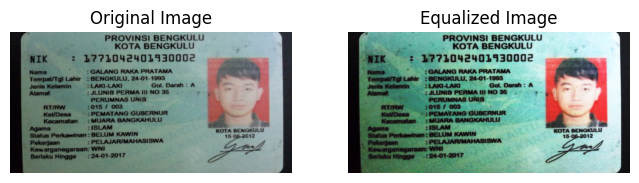

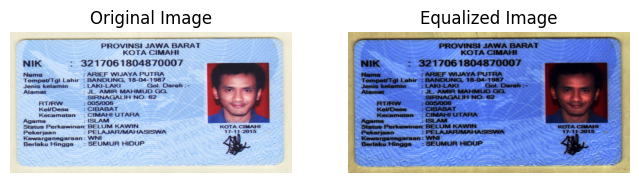

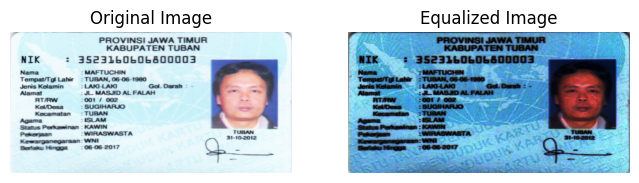

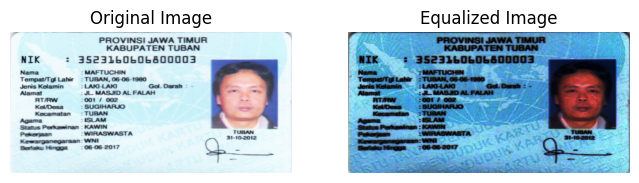

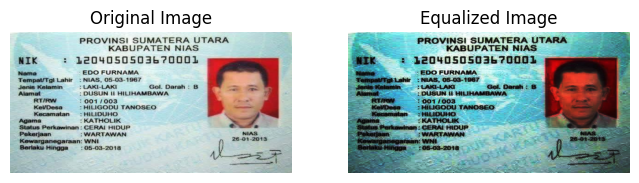

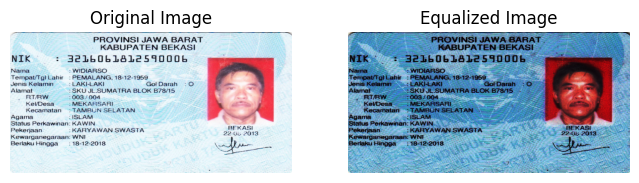

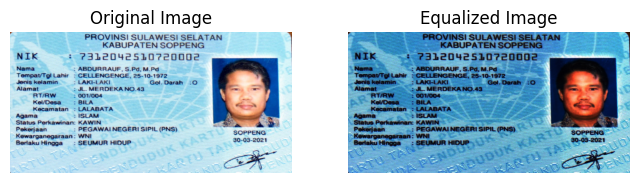

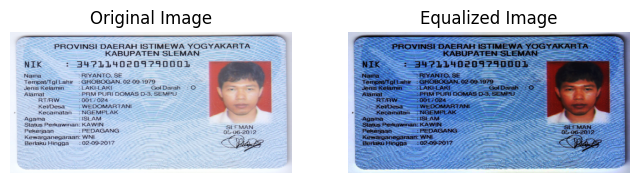

In [95]:
image_path = 'drive/MyDrive/Kuliah/PCVK/week-07/ktp'

# Define the target image size
size_image = (800, 400)  # Adjust the size as needed

# Loop through the image files and apply histogram equalization
for i in range(1,9):

    # Load the image
    img = cv.imread(f"drive/MyDrive/Kuliah/PCVK/week-07/ktp{i}.png" )

    # Resize the image to the target size
    img = cv.resize(img, size_image)

    # Calculate the equalized image
    img_array = np.asarray(img)
    histogram_array = np.bincount(img_array.flatten(), minlength=256)
    num_pixels = np.sum(histogram_array)
    histogram_array = histogram_array / num_pixels
    chistogram_array = np.cumsum(histogram_array)
    transform_map = np.floor(255 * chistogram_array).astype(np.uint8)
    img_list = list(img_array.flatten())
    eq_img_list = [transform_map[p] for p in img_list]
    eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
    equalized_img = eq_img_array

    # Display the original and equalized images using matplotlib
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
    plt.title('Equalized Image')
    plt.axis('off')

    plt.show()

#### Define function for filtering image

In [ ]:
# Define a function for performing 2D convolution
def convo2d(image, kernel, stride, padding):
  # Pad the input image with zeros based on the specified padding
  image = np.pad(image, padding, mode='constant', constant_values=0)

  # Get the height and width of the convolution kernel
  kernel_height, kernel_width = kernel.shape

  # Get the dimensions of the padded input image
  padded_height, padded_width = image.shape

  # Calculate the dimensions of the output (convolved) image
  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  # Initialize an empty array to store the resulting convolved image
  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # Perform 2D convolution by iterating over the output image's height and width
  for y in range(0, output_height):
    for x in range(0, output_width):
      # Compute the convolution result at each location
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  # Return the resulting convolved image
  return new_image


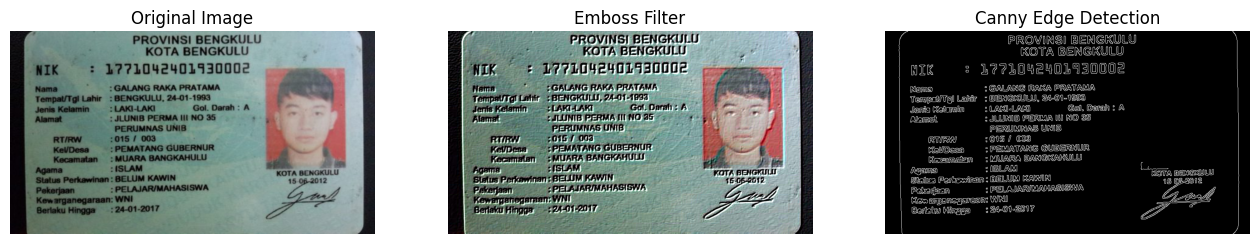

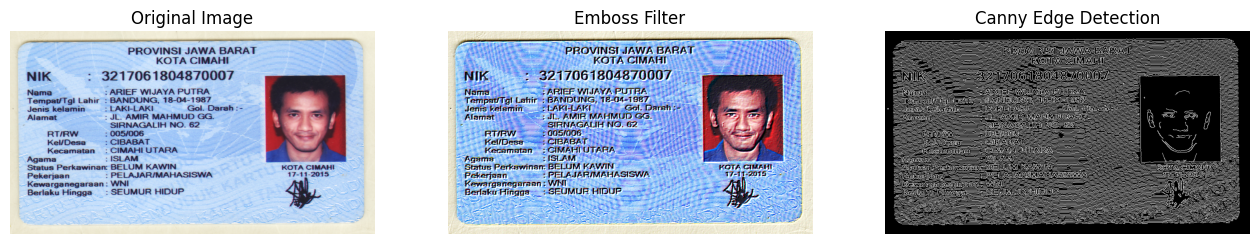

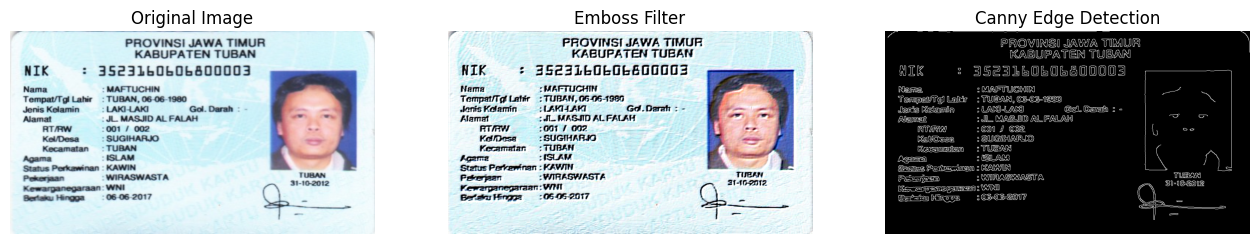

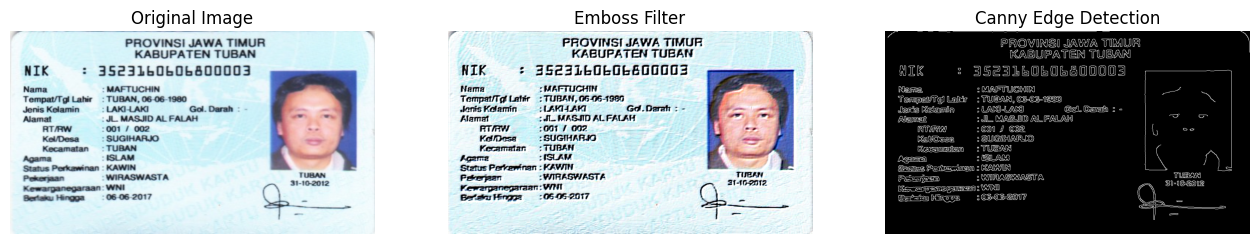

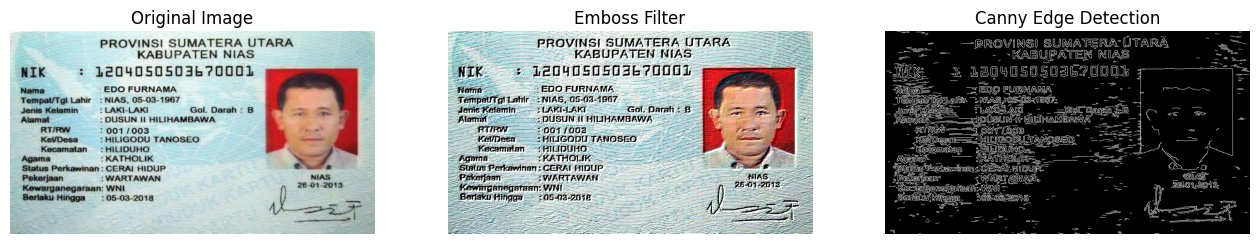

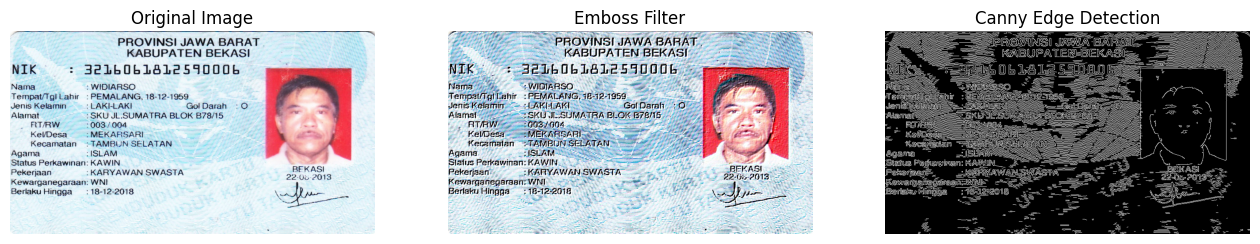

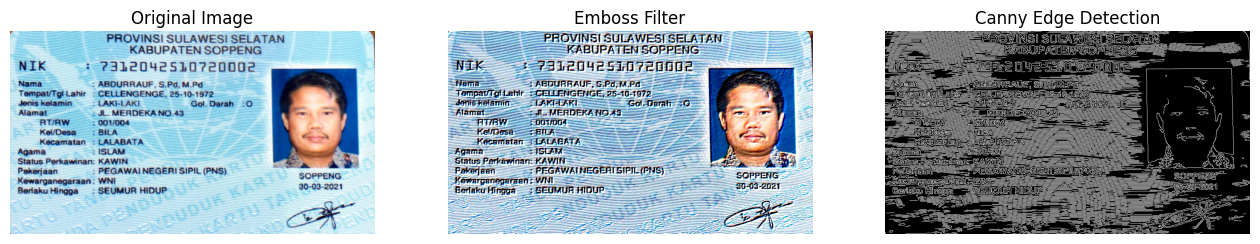

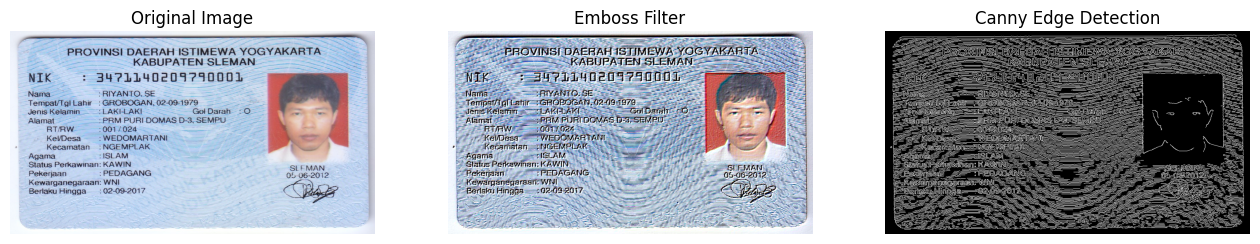

In [94]:
# Loop through the image files and apply different filters

size_image = (900, 500)  # Adjust the size as needed

for i in range(1, 9):
   # Load the image
    img = cv.imread(f"drive/MyDrive/Kuliah/PCVK/week-07/ktp{i}.png" )

    # Resize the image to the target size
    img = cv.resize(img, size_image)

    # Apply Emboss filter
    kernel_emboss = np.array([[-2, -1, 0],
                             [-1, 1, 1],
                             [0, 1, 2]])
    emboss_img = cv.filter2D(img, -1, kernel_emboss)

    # Apply Canny edge detection
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    canny_img = cv.Canny(img_gray, 100, 200)

    # Display the original and filtered images using matplotlib
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv.cvtColor(emboss_img, cv.COLOR_BGR2RGB))
    plt.title('Emboss Filter')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(canny_img, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')

    plt.show()
